In [1]:
import json
import math
import tikzplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, cm, colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

___
Create graphs of distribution's parametres averaged over multiple runs

In [2]:
class ratio_e():
    def __init__(self, e, n_runs):
        self.e = e
        self.n_runs = n_runs

        self.grid = []
        self.a_range= []

        self.E, self.E2 = [], []
        self.Z, self.Z2 = [], []
        self.accept, self.accept2 = [], []
        self.reject, self.reject2 = [], []
        self.corr, self.corr2 = [], []
        self.times, self.times2 = [], []

    @property 
    def energy(self):
        E = self.E/self.n_runs
        E_error = np.sqrt(self.E2/self.n_runs - E**2)
        return E, E_error
    
    @property 
    def coord(self):
        Z = self.Z/self.n_runs
        Z_error = np.sqrt(self.Z2/self.n_runs - Z**2)
        return Z, Z_error
    
    @property 
    def accepted_rejected(self):
        all_rotations = self.accept/self.n_runs + self.reject/self.n_runs

        accepted = self.accept/self.n_runs/all_rotations
        accepted_error = np.sqrt(self.accept2/self.n_runs/all_rotations**2 - accepted**2)

        rejected = self.reject/self.n_runs/all_rotations
        rejected_error = np.sqrt(self.reject2/self.n_runs/all_rotations**2 - rejected**2)
        return accepted, accepted_error, rejected, rejected_error
    
    @property 
    def correlation(self):
        correlation = self.corr/self.n_runs
        correlation_error = np.sqrt(self.corr2/self.n_runs - correlation**2)
        return correlation, correlation_error
    
    @property 
    def timed(self):
        timed = self.times/self.n_runs
        timed_error = np.sqrt(self.times2/self.n_runs - timed**2)
        return timed, timed_error
        

In [3]:
## initialize for each ratio e
e_1 = ratio_e(1.5, 100)

In [4]:
with np.load('data/growth_different_e/run_1/run_e_1.npz') as data:
    e_1.E, e_1.E2 = data['E'], data['E2']
    e_1.Z, e_1.Z2  = data['Z'], data['Z2']
    e_1.accept, e_1.accept2 = data['accept'], data['accept2']
    e_1.reject, e_1.reject2 = data['reject'], data['reject2']
    e_1.corr, e_1.corr2 = data['corr'], data['corr2']
    e_1.times, e_1.times2 = data['times'], data['times2']

    e_1.grid = data['grid']
    e_1.a_range = data['a_range']

for i in range(2,5):
    with np.load(f'data/growth_different_e/run_{i}/run_e_1.npz') as data:
        e_1.E += data['E']
        e_1.E2 += data['E2']
        e_1.Z += data['Z']
        e_1.Z2 += data['Z2']
        e_1.accept += data['accept']
        e_1.accept2 += data['accept2']
        e_1.reject += data['reject']
        e_1.reject2 += data['reject2']
        e_1.corr += data['corr']
        e_1.corr2 += data['corr2']
        e_1.times += data['times']
        e_1.times2 += data['times2']

In [5]:
## initialize for each ratio e
e_2 = ratio_e(2.5, 100)

In [6]:
with np.load('data/growth_different_e/run_1/run_e_2.npz') as data:
    e_2.E, e_2.E2 = data['E'], data['E2']
    e_2.Z, e_2.Z2  = data['Z'], data['Z2']
    e_2.accept, e_2.accept2 = data['accept'], data['accept2']
    e_2.reject, e_2.reject2 = data['reject'], data['reject2']
    e_2.corr, e_2.corr2 = data['corr'], data['corr2']
    e_2.times, e_2.times2 = data['times'], data['times2']

    e_2.grid = data['grid']
    e_2.a_range = data['a_range']

for i in range(2,5):
    with np.load(f'data/growth_different_e/run_{i}/run_e_2.npz') as data:
        e_2.E += data['E']
        e_2.E2 += data['E2']
        e_2.Z += data['Z']
        e_2.Z2 += data['Z2']
        e_2.accept += data['accept']
        e_2.accept2 += data['accept2']
        e_2.reject += data['reject']
        e_2.reject2 += data['reject2']
        e_2.corr += data['corr']
        e_2.corr2 += data['corr2']
        e_2.times += data['times']
        e_2.times2 += data['times2']

In [7]:
## initialize for each ratio e
e_4 = ratio_e(4/1, 100)

In [8]:
with np.load('data/growth_different_e/run_1/run_e_4.npz') as data:
    e_4.E, e_4.E2 = data['E'], data['E2']
    e_4.Z, e_4.Z2  = data['Z'], data['Z2']
    e_4.accept, e_4.accept2 = data['accept'], data['accept2']
    e_4.reject, e_4.reject2 = data['reject'], data['reject2']
    e_4.corr, e_4.corr2 = data['corr'], data['corr2']
    e_4.times, e_4.times2 = data['times'], data['times2']

    e_4.grid = data['grid']
    e_4.a_range = data['a_range']

for i in range(2,5):
    with np.load(f'data/growth_different_e/run_{i}/run_e_4.npz') as data:
        e_4.E += data['E']
        e_4.E2 += data['E2']
        e_4.Z += data['Z']
        e_4.Z2 += data['Z2']
        e_4.accept += data['accept']
        e_4.accept2 += data['accept2']
        e_4.reject += data['reject']
        e_4.reject2 += data['reject2']
        e_4.corr += data['corr']
        e_4.corr2 += data['corr2']
        e_4.times += data['times']
        e_4.times2 += data['times2']

In [9]:
## initialize for each ratio e
e_5 = ratio_e(5/1, 100)

In [10]:
with np.load('data/growth_different_e/run_1/run_e_5.npz') as data:
    e_5.E, e_5.E2 = data['E'], data['E2']
    e_5.Z, e_5.Z2  = data['Z'], data['Z2']
    e_5.accept, e_5.accept2 = data['accept'], data['accept2']
    e_5.reject, e_5.reject2 = data['reject'], data['reject2']
    e_5.corr, e_5.corr2 = data['corr'], data['corr2']
    e_5.times, e_5.times2 = data['times'], data['times2']

    e_5.grid = data['grid']
    e_5.a_range = data['a_range']

for i in range(2,5):
    with np.load(f'data/growth_different_e/run_{i}/run_e_5.npz') as data:
        e_5.E += data['E']
        e_5.E2 += data['E2']
        e_5.Z += data['Z']
        e_5.Z2 += data['Z2']
        e_5.accept += data['accept']
        e_5.accept2 += data['accept2']
        e_5.reject += data['reject']
        e_5.reject2 += data['reject2']
        e_5.corr += data['corr']
        e_5.corr2 += data['corr2']
        e_5.times += data['times']
        e_5.times2 += data['times2']

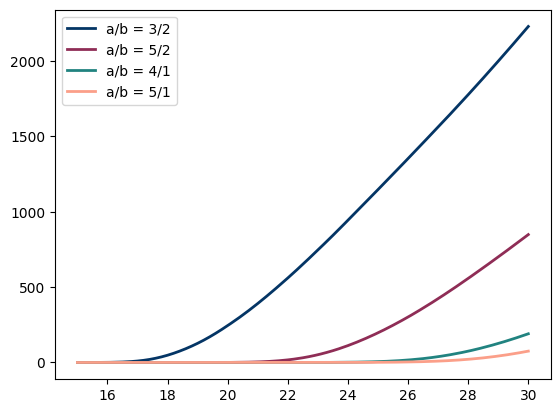

In [11]:
## energy
x = e_1.a_range
y = e_1.energy[0]
z = e_2.energy[0]
w = e_4.energy[0]
q = e_5.energy[0]

plt.plot(x, y, color='#043565', linewidth=2, label='a/b = 3/2')
plt.plot(x, z, color='#8f2d56', linewidth=2, label='a/b = 5/2')
plt.plot(x, w, color='#218380', linewidth=2, label='a/b = 4/1')
plt.plot(x, q, color='#fb9f89', linewidth=2, label='a/b = 5/1')
plt.legend(loc='upper left')
plt.show()

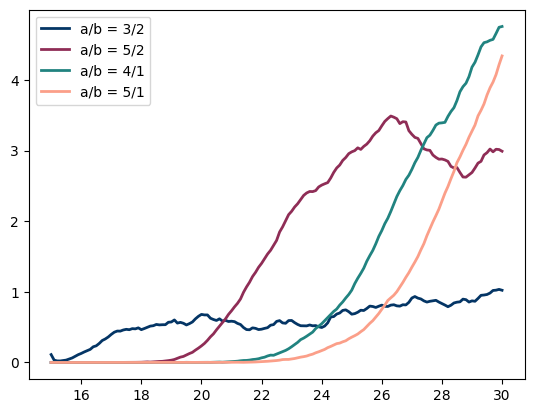

In [12]:
## energy error
x = e_1.a_range
y = e_1.energy[1]
z = e_2.energy[1]
w = e_4.energy[1]
q = e_5.energy[1]

plt.plot(x, y, color='#043565', linewidth=2, label='a/b = 3/2')
plt.plot(x, z, color='#8f2d56', linewidth=2, label='a/b = 5/2')
plt.plot(x, w, color='#218380', linewidth=2, label='a/b = 4/1')
plt.plot(x, q, color='#fb9f89', linewidth=2, label='a/b = 5/1')
plt.legend(loc='upper left')
plt.show()

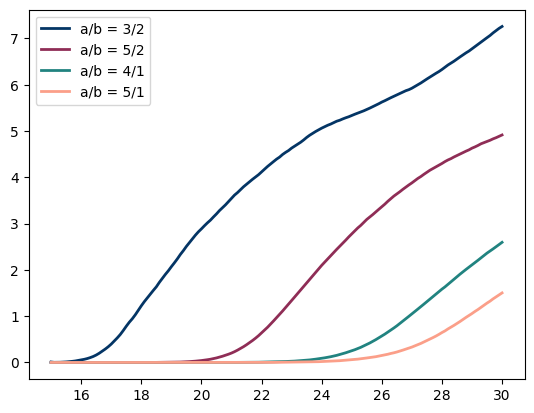

In [13]:
## coordination number
x = e_1.a_range
y = e_1.coord[0]
z = e_2.coord[0]
w = e_4.coord[0]
q = e_5.coord[0]

plt.plot(x, y, color='#043565', linewidth=2, label='a/b = 3/2')
plt.plot(x, z, color='#8f2d56', linewidth=2, label='a/b = 5/2')
plt.plot(x, w, color='#218380', linewidth=2, label='a/b = 4/1')
plt.plot(x, q, color='#fb9f89', linewidth=2, label='a/b = 5/1')
plt.legend(loc='upper left')

plt.show()

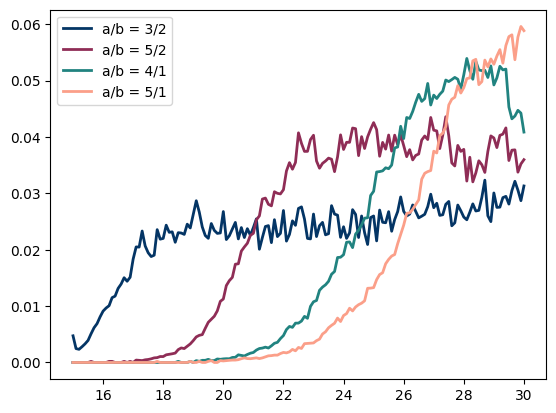

In [14]:
## coordination number error
x = e_1.a_range
y = e_1.coord[1]
z = e_2.coord[1]
w = e_4.coord[1]
q = e_5.coord[1]

plt.plot(x, y, color='#043565', linewidth=2, label='a/b = 3/2')
plt.plot(x, z, color='#8f2d56', linewidth=2, label='a/b = 5/2')
plt.plot(x, w, color='#218380', linewidth=2, label='a/b = 4/1')
plt.plot(x, q, color='#fb9f89', linewidth=2, label='a/b = 5/1')
plt.legend(loc='upper left')


plt.show()


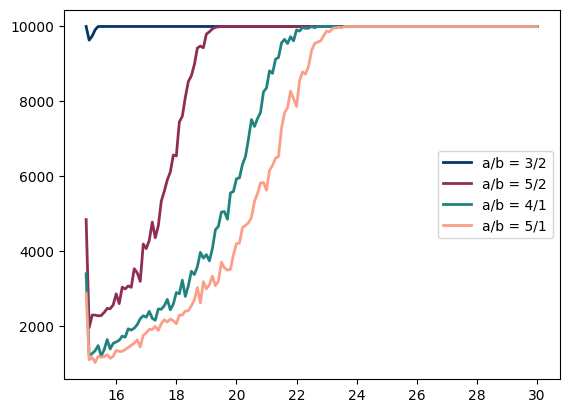

In [15]:
## average number of iterations of Monte Carlo at each step --> the cause of the seemingly large
## error of standard deviation

x = e_1.a_range
y = e_1.accept/e_1.n_runs + e_1.reject/e_1.n_runs
z = e_2.accept/e_2.n_runs + e_2.reject/e_2.n_runs
w = e_4.accept/e_4.n_runs + e_4.reject/e_4.n_runs
q = e_5.accept/e_5.n_runs + e_5.reject/e_5.n_runs

plt.plot(x, y, color='#043565', linewidth=2, label='a/b = 3/2')
plt.plot(x, z, color='#8f2d56', linewidth=2, label='a/b = 5/2')
plt.plot(x, w, color='#218380', linewidth=2, label='a/b = 4/1')
plt.plot(x, q, color='#fb9f89', linewidth=2, label='a/b = 5/1')
plt.legend(loc='center right')
plt.show()

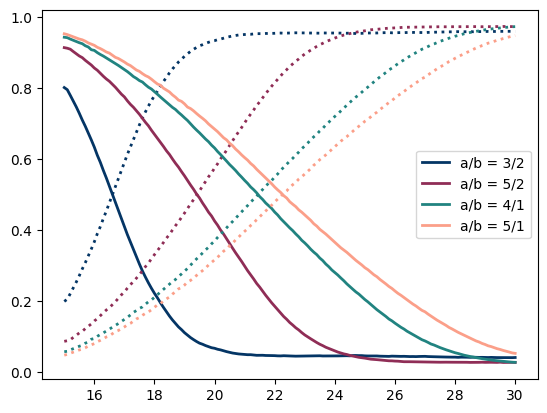

In [16]:
## ratio of accepted and rejected rotations
x = e_1.a_range
y1, y2 = e_1.accepted_rejected[0], e_1.accepted_rejected[2]
z1, z2 = e_2.accepted_rejected[0], e_2.accepted_rejected[2]
w1, w2 = e_4.accepted_rejected[0], e_4.accepted_rejected[2]
q1, q2 = e_5.accepted_rejected[0], e_5.accepted_rejected[2]

plt.plot(x, y1, color='#043565', linewidth=2, label='a/b = 3/2')
plt.plot(x, y2, color='#043565', linestyle='dotted', linewidth=2)
plt.plot(x, z1, color='#8f2d56', linewidth=2, label='a/b = 5/2')
plt.plot(x, z2, color='#8f2d56', linestyle='dotted', linewidth=2)
plt.plot(x, w1, color='#218380', linewidth=2, label='a/b = 4/1')
plt.plot(x, w2, color='#218380', linestyle='dotted', linewidth=2)
plt.plot(x, q1, color='#fb9f89', linewidth=2, label='a/b = 5/1')
plt.plot(x, q2, color='#fb9f89', linestyle='dotted', linewidth=2)
plt.legend(loc='center right')
plt.show()

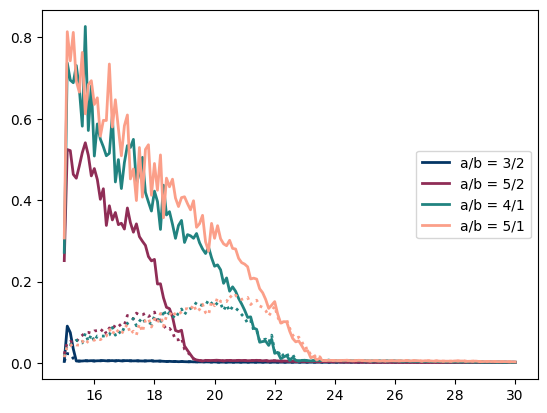

In [17]:
## roations error
x = e_1.a_range
y1, y2 = e_1.accepted_rejected[1], e_1.accepted_rejected[3]
z1, z2 = e_2.accepted_rejected[1], e_2.accepted_rejected[3]
w1, w2 = e_4.accepted_rejected[1], e_4.accepted_rejected[3]
q1, q2 = e_5.accepted_rejected[1], e_5.accepted_rejected[3]

plt.plot(x, y1, color='#043565', linewidth=2, label='a/b = 3/2')
plt.plot(x, y2, color='#043565', linestyle='dotted', linewidth=2)
plt.plot(x, z1, color='#8f2d56', linewidth=2, label='a/b = 5/2')
plt.plot(x, z2, color='#8f2d56', linestyle='dotted', linewidth=2)
plt.plot(x, w1, color='#218380', linewidth=2, label='a/b = 4/1')
plt.plot(x, w2, color='#218380', linestyle='dotted', linewidth=2)
plt.plot(x, q1, color='#fb9f89', linewidth=2, label='a/b = 5/1')
plt.plot(x, q2, color='#fb9f89', linestyle='dotted', linewidth=2)
plt.legend(loc='center right')

plt.show()

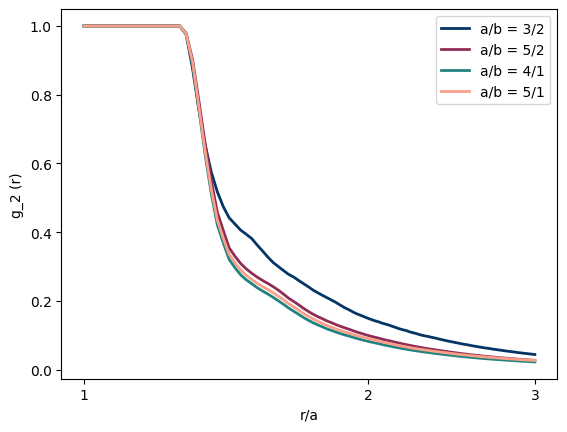

In [18]:
## correlation function
r = np.linspace(1,3, 100)
y = e_1.correlation[0]
z = e_2.correlation[0]
w = e_4.correlation[0]
q = e_5.correlation[0]

plt.plot(r, y, color='#043565', linewidth=2, label='a/b = 3/2')
plt.plot(r, z, color='#8f2d56', linewidth=2, label='a/b = 5/2')
plt.plot(r, w, color='#218380', linewidth=2, label='a/b = 4/1')
plt.plot(r, q, color='#fb9f89', linewidth=2, label='a/b = 5/1')

plt.xscale('log')
plt.xticks([1, 2, 3], [1, 2, 3])

plt.xlabel('r/a')
plt.ylabel('g_2 (r)')

plt.legend(loc='upper right')
plt.show()

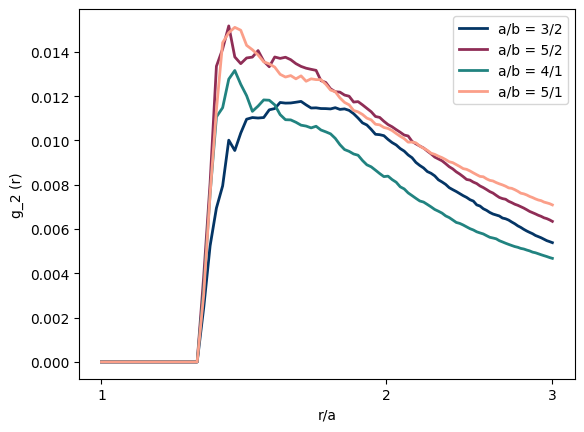

In [19]:
## correlation error
r = np.linspace(1,3, 100)
y = e_1.correlation[1]
z = e_2.correlation[1]
w = e_4.correlation[1]
q = e_5.correlation[1]

plt.plot(r, y, color='#043565', linewidth=2, label='a/b = 3/2')
plt.plot(r, z, color='#8f2d56', linewidth=2, label='a/b = 5/2')
plt.plot(r, w, color='#218380', linewidth=2, label='a/b = 4/1')
plt.plot(r, q, color='#fb9f89', linewidth=2, label='a/b = 5/1')

plt.xscale('log')
plt.xticks([1, 2, 3], [1, 2, 3])

plt.xlabel('r/a')
plt.ylabel('g_2 (r)')

plt.legend(loc='upper right')
plt.show()

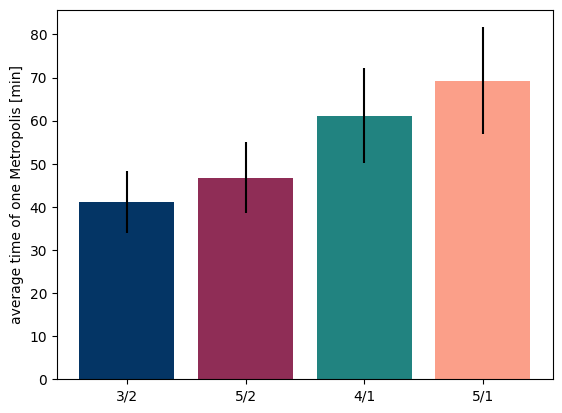

In [20]:
## average times to run one Metropolis in minntes with standard deviation

Times = [e_1.timed[0]/60, e_2.timed[0]/60, e_4.timed[0]/60, e_5.timed[0]/60]
time_errors = [e_1.timed[1]/60, e_2.timed[1]/60, e_4.timed[1]/60, e_5.timed[1]/60]

ratios = ['3/2', '5/2', '4/1', '5/1']
bar_colors = ['#043565', '#8f2d56', '#218380', '#fb9f89']
bar_labels = ['3/2', '5/2', '4/1', '5/1']

plt.bar(ratios, Times, yerr=time_errors, color=bar_colors)

plt.ylabel('average time of one Metropolis [min]')
plt.show()

_______________
Compare configurations with different number of candidates k (0, 2, 5, 50, 500, 1000)

In [21]:
json_data = open("data/different_k.json")
data = json.load(json_data)
json_data.close()

states = [data[key] for key in data]

In [22]:
def convert_to_patches(center, a, b, angle):
    return patches.Ellipse(self.center, 2*a, 2*b, angle=self.angle*180/math.pi)


/tmp/ipykernel_248512/3227675763.py:7: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = patches.Ellipse(center, a, b, angle)


(0.0, 1000.0)

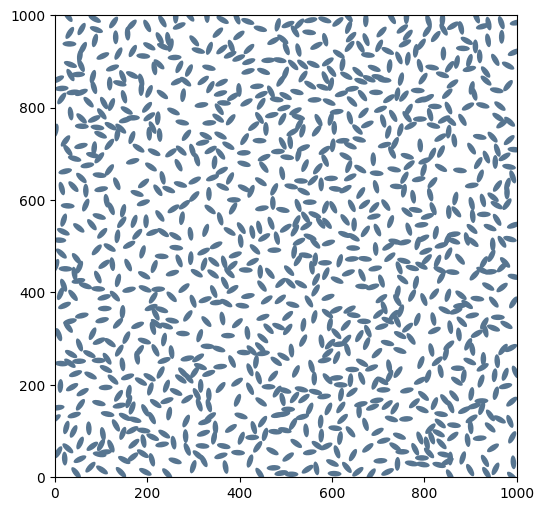

In [24]:
distribution = states[2]
grid = [1000,1000]

plt.figure(figsize=(6,6))
for sample in distribution:
    center, a, b, angle = sample['center'], 2*sample['a'], 2*sample['b'], sample['angle']*180/math.pi
    ellipse = patches.Ellipse(center, a, b, angle)

    plt.gca().add_patch(ellipse)
    ellipse.set_facecolor('#577590')
    ellipse.set_label('_nolegend_')

plt.axis('scaled')
plt.xlim(0.0, grid[0])
plt.ylim(0.0, grid[1])

Time needed to generate distributions at k = {0, 2, 5, 50, 500, 1000} --> times (in seconds) = {3.61, 0.06, 0.10, 0.56, 5.37, 10.87}

______________
This part creates gif of growth process

In [ ]:
json_data = open("data/growth/different_k/k_2.json")
data = json.load(json_data)
json_data.close()

growth = [data[key] for key in data]

In [ ]:
def convert_to_patches(center, a, b, angle):
    return patches.Ellipse(self.center, 2*a, 2*b, angle=self.angle*180/math.pi)


In [ ]:
Energy = [[sample['energy'] for sample in state] for state in growth]
coord_number = [[sample['coord'] for sample in state] for state in growth]

In [ ]:
# let's have fun with colours --> map energy values to color palette
my_palette = LinearSegmentedColormap.from_list('custom red', ["#577590", "#f94144", "#f8961e"], N=256)
# my_palette = LinearSegmentedColormap.from_list('custom red', ["#ffffff", "#ff0a54"], N=256)

## heatmap of energy
minima = np.round(np.min(Energy), 2)
maxima = np.round(np.max(Energy), 2)

## heatmap of coordination number
# minima = np.round(np.min(coord_number), 2)
# maxima = np.round(np.max(coord_number), 2)

norm = colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=my_palette)

/tmp/ipykernel_227127/3927874001.py:9: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = patches.Ellipse(center, a, b, angle)
/tmp/ipykernel_227127/3927874001.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper, ticks=cbar, shrink=0.85, orientation='vertical')


(0.0, 1000.0)

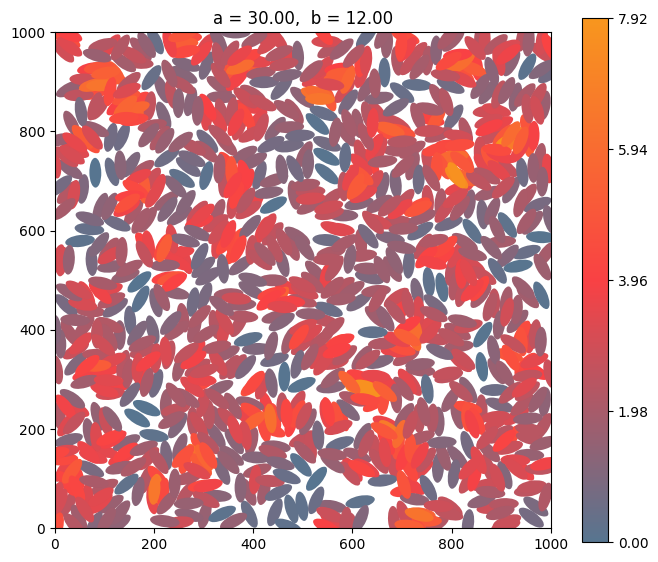

In [ ]:
distribution = growth[-1]
grid = [1000,1000]

plt.figure(figsize=(8,8))
for sample in distribution:
    v = sample['energy']

    center, a, b, angle = sample['center'], 2*sample['a'], 2*sample['b'], sample['angle']*180/math.pi
    ellipse = patches.Ellipse(center, a, b, angle)

    plt.gca().add_patch(ellipse)
    ellipse.set_facecolor(mapper.to_rgba(v))
    ellipse.set_label('_nolegend_')

    plt.title(f'a = {a/2:.2f},  b = {b/2:.2f}')

cbar = np.round( np.linspace(minima, maxima, 5, endpoint=True), 2)
plt.colorbar(mapper, ticks=cbar, shrink=0.85, orientation='vertical')

plt.axis('scaled')
plt.xlim(0.0, grid[0])
plt.ylim(0.0, grid[1])

In [82]:
## save image of the system at each step to create gif
grid = [1000,1000]
i = 1
for distribution in growth:
    plt.figure(figsize=(8,8))
    for sample in distribution:
        v = sample['energy']

        center, a, b, angle = sample['center'], 2*sample['a'], 2*sample['b'], sample['angle']*180/math.pi
        ellipse = patches.Ellipse(center, a, b, angle)

        plt.gca().add_patch(ellipse)
        ellipse.set_facecolor(mapper.to_rgba(v))
        ellipse.set_label('_nolegend_')

        plt.title(f'a = {a/2:.2f},  b = {b/2:.2f}')

    cbar = np.round( np.linspace(minima, maxima, 5, endpoint=True), 2)
    plt.colorbar(mapper, ticks=cbar, shrink=0.85, orientation='vertical')

    plt.axis('scaled')
    plt.xlim(0.0, grid[0])
    plt.ylim(0.0, grid[1])

    output_name = "../figures/gifs/e_50/" + f"pic{i:02d}.png"
    plt.savefig(output_name, bbox_inches='tight')
    plt.close()
    i += 1

/tmp/ipykernel_186862/3511438388.py:10: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = patches.Ellipse(center, a, b, angle)
/tmp/ipykernel_186862/3511438388.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mapper, ticks=cbar, shrink=0.85, orientation='vertical')


Times needed to generate growth images for k0 = {0, 2, 10, 100, 1000}: times = {605.29, 1264.50, 2568.33, 2327.04, 2241.32}. 
__naredi jih več da povprečiš te čase__
preveri čase samo za generiranje mreže